# LA-EEPCA - UCI Wine dataset

In [1]:
import pandas as pd
from sklearn.datasets import load_wine

# Load the UCI Wine dataset
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [28]:
df.shape

(178, 14)

## Data exploration

In [ ]:
# data types of all features
df.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
target                            int64
dtype: object

In [3]:
df.target.value_counts()

target
1    71
0    59
2    48
Name: count, dtype: int64

In [ ]:
# missing values
df.isna().sum().sum()

np.int64(0)

## PCA implementation

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [ ]:
# split and standardise
X = df.drop('target', axis=1)
y = df['target']

# Standardise
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# fit PCA to full dimensionality
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

### plot features and PCA Component Loadings

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

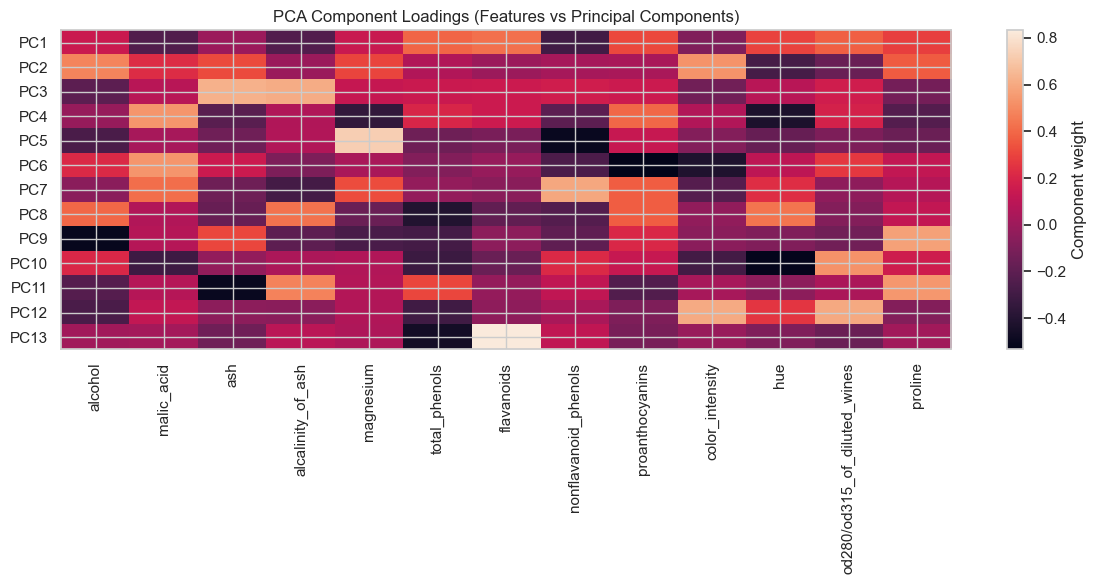

In [12]:
plt.figure(figsize=(12, 6))
plt.imshow(pca.components_, aspect='auto')
plt.colorbar(label='Component weight')
plt.xticks(range(len(X.columns)), X.columns, rotation=90)
plt.yticks(range(len(pca.components_)), [f'PC{i+1}' for i in range(len(pca.components_))])
plt.title('PCA Component Loadings (Features vs Principal Components)')
plt.tight_layout()
plt.show()

In [13]:
# Helper function: select PCs and train a model
def train_with_pcs(k):
	"""
	Train a logistic regression model using the first k principal components.
	Returns the mean cross-validated accuracy.
	"""
	X_subset = X_pca[:, :k]
	model = LogisticRegression(max_iter=100)
	scores = cross_val_score(model, X_subset, y, cv=5)
	return scores.mean()


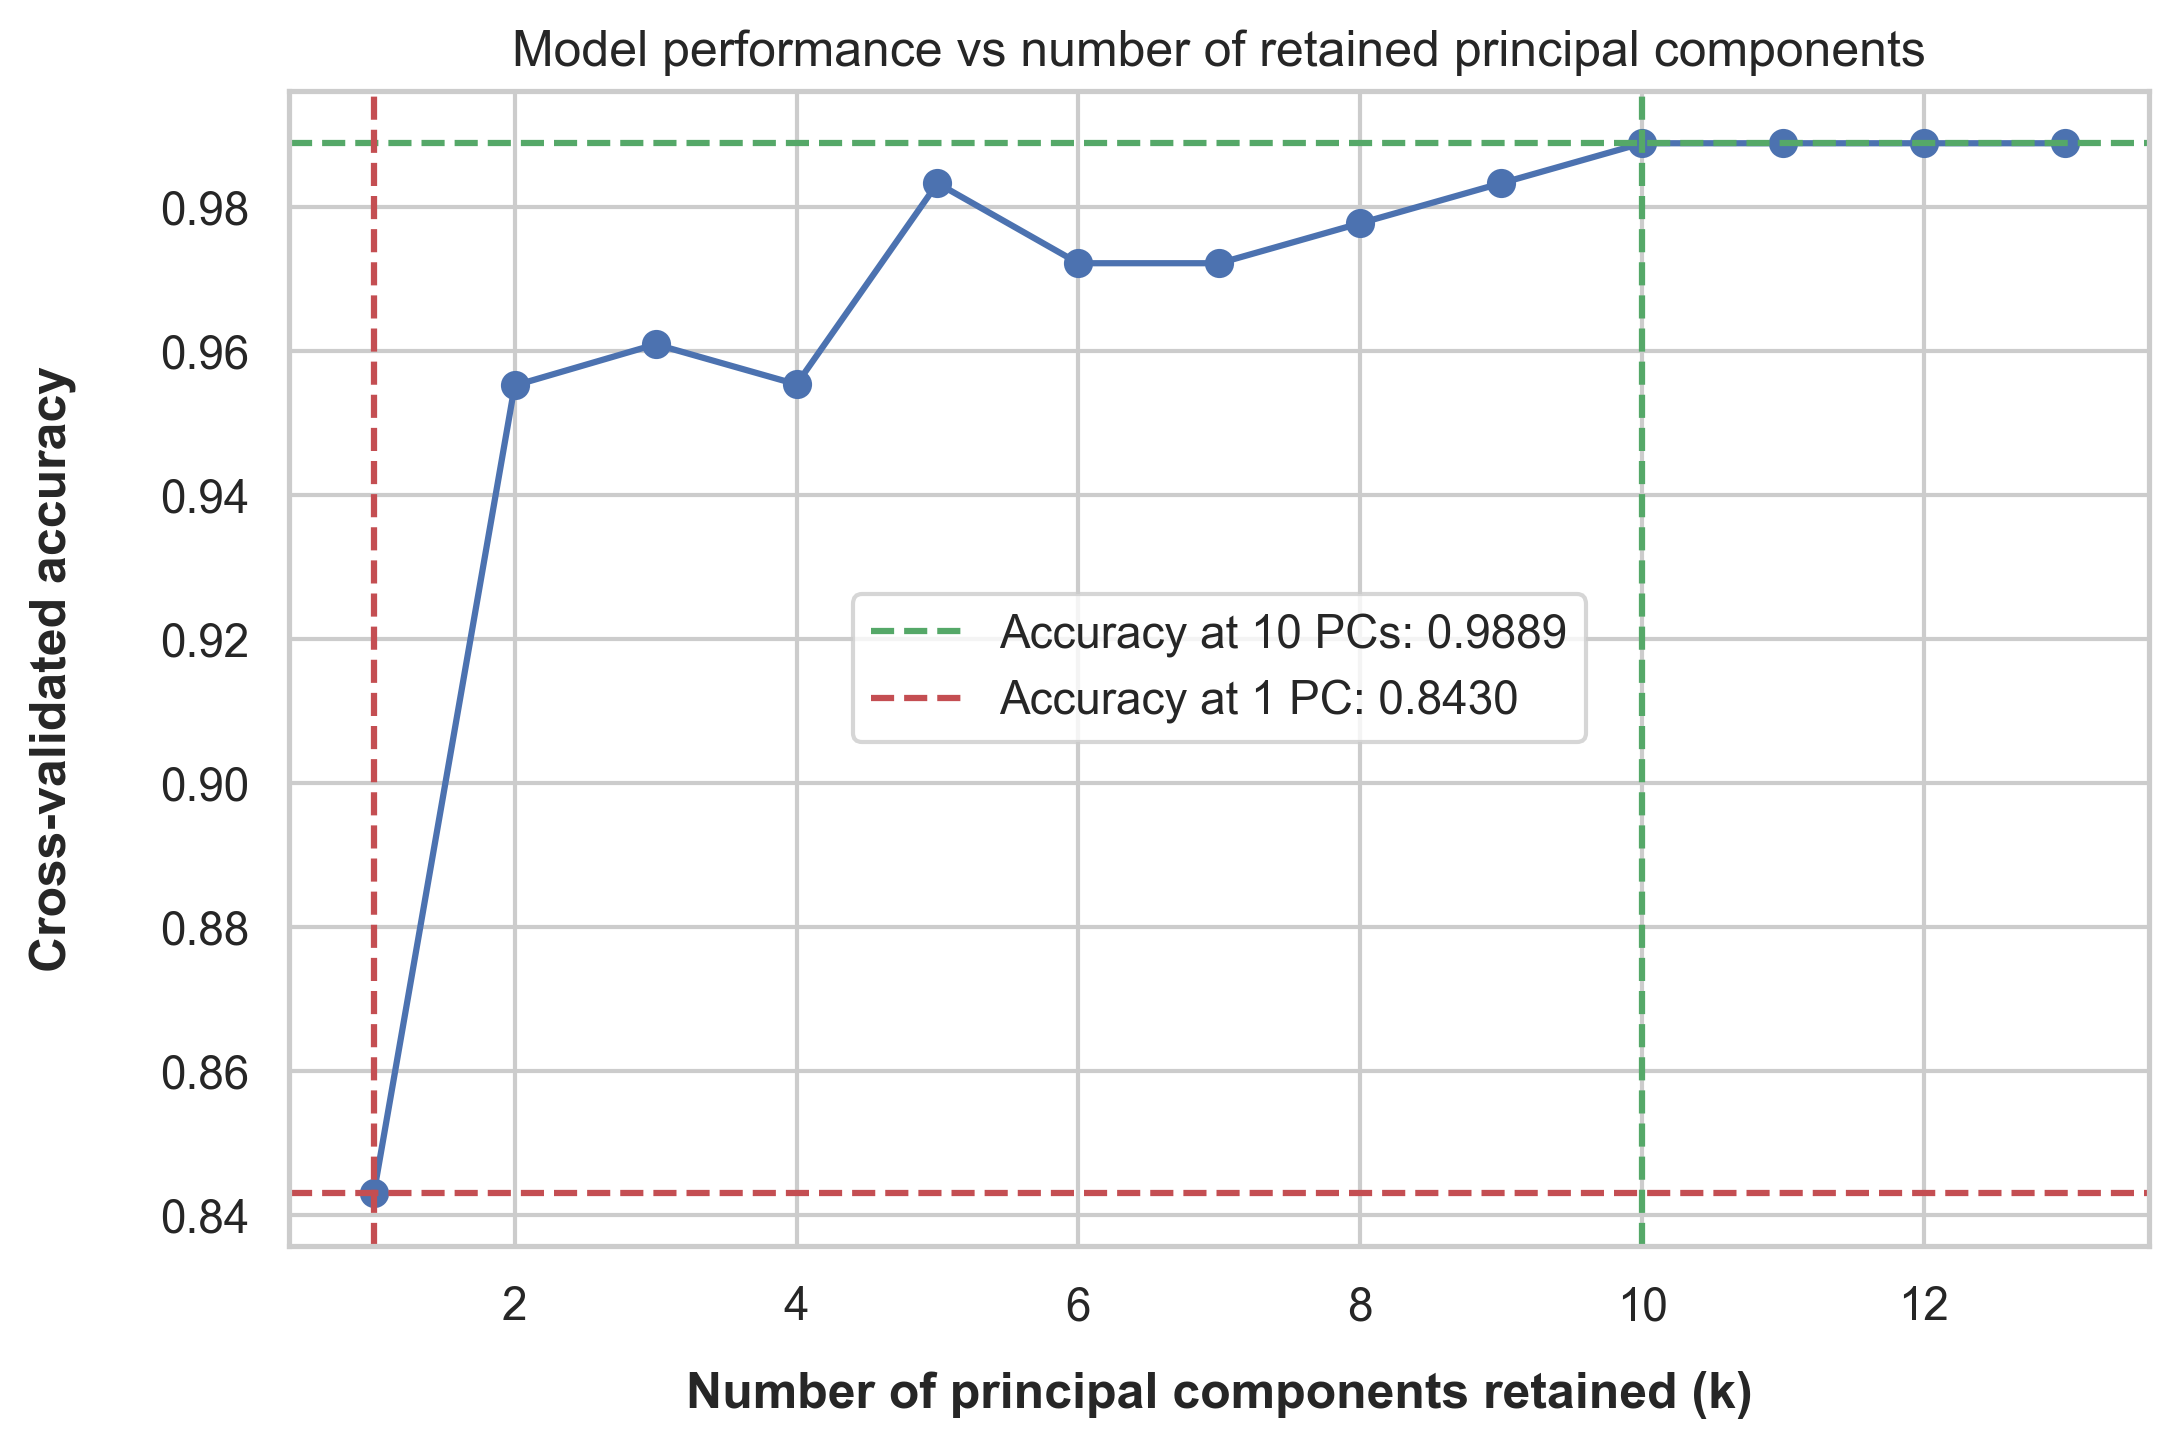

In [48]:
# Evaluate performance as a function of retained PCs
k_values = range(1, X.shape[1] + 1)
accuracies = [train_with_pcs(k) for k in k_values]

plt.figure(figsize=(8, 5), dpi=300)
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Number of principal components retained (k)', labelpad=10, fontfamily="Arial", fontweight="bold")
plt.ylabel('Cross-validated accuracy', labelpad=20, fontfamily="Arial", fontweight="bold")
plt.title('Model performance vs number of retained principal components', fontfamily="Arial")


plt.axvline(x=10, color='g', linestyle='--')
plt.axhline(y=accuracies[9], color='g', linestyle='--', label=f'Accuracy at 10 PCs: {accuracies[9]:.4f}')

plt.axvline(x=1, color='r', linestyle='--')
plt.axhline(y=accuracies[0], color='r', linestyle='--', label=f'Accuracy at 1 PC: {accuracies[0]:.4f}')



plt.legend(loc='center')
plt.grid(True)
plt.show()
